In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msng

In [0]:
pit_total = pd.read_csv('../Data/MLB_data_edit/pit_total.csv', encoding='euc-kr')
bat_total = pd.read_csv('../Data/MLB_data_edit/bat_total.csv', encoding='euc-kr')
rank_total = pd.read_csv('../Data/MLB_data_edit/rank_total.csv', encoding='euc-kr')


In [0]:
del pit_total['Unnamed: 0']

In [0]:
del bat_total['Unnamed: 0']

In [0]:
del rank_total['Unnamed: 0']

In [0]:
pit_total

,Year,Player,Team,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,2010,Roy Halladay,PHI,33,33,9,4,250.2,231,68,219,30,24,21,10,0,0,0,2.44,1.04
1,2010,Felix Hernandez,SEA,34,34,6,1,249.2,194,63,232,70,17,13,12,0,0,0,2.27,1.06
2,2010,CC Sabathia,NYY,34,34,2,0,237.2,209,84,197,74,20,21,7,0,0,0,3.18,1.19
3,2010,Chris Carpenter,STL,35,35,1,0,235.0,214,84,179,63,21,16,9,0,0,0,3.22,1.18
4,2010,Adam Wainwright,STL,33,33,5,2,230.1,186,62,213,56,15,20,11,0,0,0,2.42,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,2019,Deolis Guerra,MIL,1,0,0,0,0.2,4,4,0,0,1,0,0,0,0,0,54.00,6.00
7634,2019,Dellin Betances,NYY,1,0,0,0,0.2,0,0,2,0,0,0,0,0,0,0,0.00,0.00
7635,2019,Jose Castillo,SD,1,0,0,0,0.2,0,0,2,1,0,0,0,0,0,0,0.00,1.50
7636,2019,Austen Williams,WAS,2,0,0,0,0.1,5,6,1,1,2,0,0,0,0,0,162.00,18.00


In [0]:
bat_total

,Year,Player,Team,Pos,G,AB,R,TH,H,2B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,2010,Ichiro Suzuki,SEA,OF,162,680,74,214,175,30,...,9,45,86,3,1,3,0.315,0.359,0.394,0.753
1,2010,Derek Jeter,NYY,SS,157,663,111,179,136,30,...,5,63,106,1,3,9,0.270,0.340,0.370,0.710
2,2010,Michael Young,TEX,3B,157,656,99,186,126,36,...,2,50,115,0,11,1,0.284,0.330,0.444,0.774
3,2010,Juan Pierre,CWS,OF,160,651,96,179,157,18,...,18,45,47,15,2,21,0.275,0.341,0.316,0.657
4,2010,Rickie Weeks,MIL,DH,160,651,112,175,110,32,...,4,76,184,0,2,25,0.269,0.366,0.464,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,2019,Jose Rondon,BAL,2B,1,1,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
6844,2019,Travis d'Arnaud,LAD,C,1,1,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
6845,2019,Aaron Altherr,SF,OF,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000
6846,2019,Rob Brantly,PHI,C,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000


In [0]:
rank_total

,Year,Team,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF
0,2010,Philadelphia Phillies,97,65,0.599,-,54-30,43-35,772,640,132
1,2010,TB Rays,96,66,0.593,1,49-32,47-34,802,649,153
2,2010,NY Yankees,95,67,0.586,2,52-29,43-38,859,693,166
3,2010,Minnesota Twins,94,68,0.580,3,53-28,41-40,781,671,110
4,2010,San Francisco Giants,92,70,0.568,5,49-32,43-38,697,583,114
...,...,...,...,...,...,...,...,...,...,...,...
295,2019,Toronto Blue Jays,67,95,0.414,40,35-46,32-49,726,828,-102
296,2019,KC Royals,59,103,0.364,48,31-50,28-53,691,869,-178
297,2019,Miami Marlins,57,105,0.352,50,30-51,27-54,615,808,-193
298,2019,Baltimore Orioles,54,108,0.333,53,25-56,29-52,729,981,-252


In [0]:
IP=pit_total.groupby(by=['Year','Team']).IP.mean()
H=pit_total.groupby(by=['Year','Team']).H.mean()
K=pit_total.groupby(by=['Year','Team']).K.mean()
BB=pit_total.groupby(by=['Year','Team']).BB.mean()
HR=pit_total.groupby(by=['Year','Team']).HR.mean()
ERA=pit_total.groupby(by=['Year','Team']).ERA.mean()
WHIP=pit_total.groupby(by=['Year','Team']).WHIP.mean()
PCT = rank_total.sort_values(by=['Year','Team'])
# Year, Team으로 묶여 있으니까 같이 정렬됨

pit_df = pd.DataFrame({'IP':pit_total.groupby(by=['Year','Team']).IP.mean().values,
                                'H':pit_total.groupby(by=['Year','Team']).H.mean().values,
                                'K':pit_total.groupby(by=['Year','Team']).K.mean().values,
                                'BB':pit_total.groupby(by=['Year','Team']).BB.mean().values,
                                'HR':pit_total.groupby(by=['Year','Team']).HR.mean().values,
                                'ERA':pit_total.groupby(by=['Year','Team']).ERA.mean().values,
                                'WHIP':pit_total.groupby(by=['Year','Team']).WHIP.mean().values
                               })

pit_df

,IP,H,K,BB,HR,ERA,WHIP
0,50.967857,53.678571,38.214286,19.571429,7.500000,6.366429,1.735714
1,68.295238,63.142857,59.095238,24.047619,6.000000,5.517143,1.557143
2,62.165217,65.565217,43.782609,22.608696,8.086957,5.522609,1.606957
3,63.043478,60.869565,52.434783,25.217391,6.565217,6.027826,1.750870
4,62.260870,61.260870,55.130435,26.304348,6.695652,5.504783,1.597391
...,...,...,...,...,...,...,...
295,65.345455,58.363636,63.545455,24.772727,8.681818,5.150455,1.466818
296,47.209677,40.903226,52.290323,14.612903,5.806452,4.217097,1.288710
297,41.958824,44.382353,40.529412,17.147059,7.029412,8.743235,2.190294
298,38.594595,39.054054,35.918919,16.297297,6.135135,6.418919,1.740541


In [0]:
pit_df["PCT"]=rank_total["PCT"]

In [0]:
pit_df.to_csv('../Data/MLB_data_edit/p_total_no_scale.csv')

In [0]:
pit_df

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,50.967857,53.678571,38.214286,19.571429,7.500000,6.366429,1.735714,0.599
1,68.295238,63.142857,59.095238,24.047619,6.000000,5.517143,1.557143,0.593
2,62.165217,65.565217,43.782609,22.608696,8.086957,5.522609,1.606957,0.586
3,63.043478,60.869565,52.434783,25.217391,6.565217,6.027826,1.750870,0.580
4,62.260870,61.260870,55.130435,26.304348,6.695652,5.504783,1.597391,0.568
...,...,...,...,...,...,...,...,...
295,65.345455,58.363636,63.545455,24.772727,8.681818,5.150455,1.466818,0.414
296,47.209677,40.903226,52.290323,14.612903,5.806452,4.217097,1.288710,0.364
297,41.958824,44.382353,40.529412,17.147059,7.029412,8.743235,2.190294,0.352
298,38.594595,39.054054,35.918919,16.297297,6.135135,6.418919,1.740541,0.333


In [0]:
# 상관계수 구하기
col = ['IP','H','K','BB','HR','ERA','WHIP']
IP=np.corrcoef(pit_df['IP'],pit_df['PCT'])
H=np.corrcoef(pit_df['H'],pit_df['PCT'])
K=np.corrcoef(pit_df['K'],pit_df['PCT'])
BB=np.corrcoef(pit_df['BB'],pit_df['PCT'])
HR=np.corrcoef(pit_df['HR'],pit_df['PCT'])
ERA=np.corrcoef(pit_df['ERA'],pit_df['PCT'])
WHIP=np.corrcoef(pit_df['WHIP'],pit_df['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'IP':IP[1][0],
    'H':H[1][0],
    'K':K[1][0],
    'BB':BB[1][0],
    'HR':HR[1][0],
    'ERA':ERA[1][0],
    'WHIP':WHIP[1][0]
},index=['corrcoef'])

In [0]:
hitmap=np.abs(hitmap)

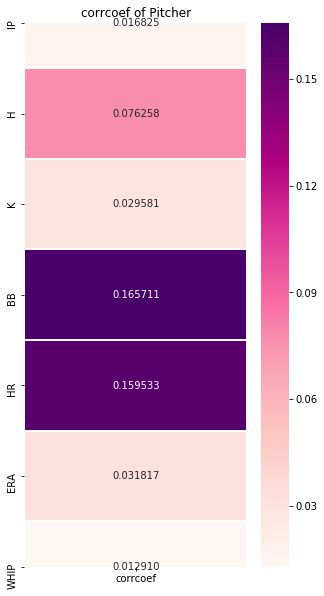

In [0]:
plt.figure(figsize=(5,10))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Pitcher')
plt.show()
# 표준화 하지 않은 히트맵

In [0]:
# MinMaxscaler 표준화 작업

col=['IP', 'H', 'K','BB', 'HR', 'ERA', 'WHIP','PCT']
x=pit_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_MMS = min_max_scaler.fit_transform(x)

In [0]:
pit_MMS = pd.DataFrame(x_MMS, columns=col, index=pit_df.index)

In [0]:
pit_df.head(1)

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,50.967857,53.678571,38.214286,19.571429,7.5,6.366429,1.735714,0.599


In [0]:
pit_MMS.head(1)

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,0.303595,0.394479,0.149912,0.348935,0.573123,0.34942,0.459961,0.819629


In [0]:
pit_MMS.to_csv('../Data/MLB_data_edit/p_total_MMS.csv')

In [0]:
# 상관계수 구하기
col = ['IP','H','K','BB','HR','ERA','WHIP']
IP=np.corrcoef(pit_MMS['IP'],pit_MMS['PCT'])
H=np.corrcoef(pit_MMS['H'],pit_MMS['PCT'])
K=np.corrcoef(pit_MMS['K'],pit_MMS['PCT'])
BB=np.corrcoef(pit_MMS['BB'],pit_MMS['PCT'])
HR=np.corrcoef(pit_MMS['HR'],pit_MMS['PCT'])
ERA=np.corrcoef(pit_MMS['ERA'],pit_MMS['PCT'])
WHIP=np.corrcoef(pit_MMS['WHIP'],pit_MMS['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'IP':IP[1][0],
    'H':H[1][0],
    'K':K[1][0],
    'BB':BB[1][0],
    'HR':HR[1][0],
    'ERA':ERA[1][0],
    'WHIP':WHIP[1][0]
},index=['corrcoef'])

In [0]:
hitmap=np.abs(hitmap)

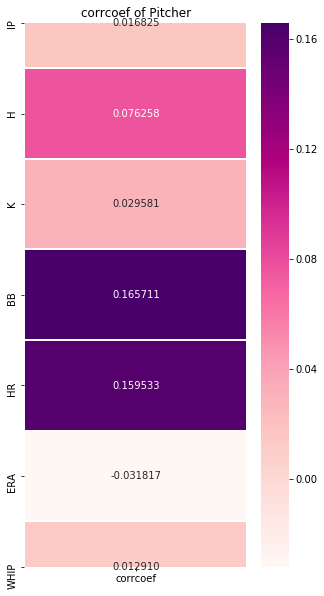

In [0]:
plt.figure(figsize=(5,10))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Pitcher')
plt.show()

In [0]:
pit_df.head(1)

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,50.967857,53.678571,38.214286,19.571429,7.5,6.366429,1.735714,0.599


In [0]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [0]:
# StandardScaler 표준화 작업

col=['IP', 'H', 'K','BB', 'HR', 'ERA', 'WHIP','PCT']
x=pit_df.values
StandardScaler = preprocessing.StandardScaler()
x_SSC = StandardScaler.fit_transform(x)

In [0]:
pit_SSC = pd.DataFrame(x_SSC, columns=col, index=pit_df.index)

In [0]:
pit_SSC

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,-0.756509,-0.295178,-1.374112,-0.164588,0.571534,0.937228,1.320349,1.350501
1,1.088609,0.795338,0.890813,1.224710,-0.738494,0.279088,0.300800,1.268644
2,0.435849,1.074453,-0.770124,0.778104,1.084154,0.283324,0.585210,1.173145
3,0.529372,0.533399,0.168363,1.587778,-0.244860,0.674833,1.406878,1.091288
4,0.446035,0.578487,0.460757,1.925142,-0.130945,0.269510,0.530597,0.927574
...,...,...,...,...,...,...,...,...
295,0.774499,0.244655,1.373521,1.449766,1.603677,-0.005071,-0.214907,-1.173417
296,-1.156702,-1.767208,0.152694,-1.703590,-0.907530,-0.728360,-1.231813,-1.855557
297,-1.715842,-1.366328,-1.122994,-0.917052,0.160545,2.779093,3.915761,-2.019271
298,-2.074085,-1.980278,-1.623086,-1.180796,-0.620474,0.977904,1.347904,-2.278484


In [0]:
pit_SSC.to_csv('../Data/MLB_data_edit/p_total_SSC.csv')

In [0]:
# 상관계수 구하기
col = ['IP','H','K','BB','HR','ERA','WHIP']
IP=np.corrcoef(pit_SSC['IP'],pit_SSC['PCT'])
H=np.corrcoef(pit_SSC['H'],pit_SSC['PCT'])
K=np.corrcoef(pit_SSC['K'],pit_SSC['PCT'])
BB=np.corrcoef(pit_SSC['BB'],pit_SSC['PCT'])
HR=np.corrcoef(pit_SSC['HR'],pit_SSC['PCT'])
ERA=np.corrcoef(pit_SSC['ERA'],pit_SSC['PCT'])
WHIP=np.corrcoef(pit_SSC['WHIP'],pit_SSC['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'IP':IP[1][0],
    'H':H[1][0],
    'K':K[1][0],
    'BB':BB[1][0],
    'HR':HR[1][0],
    'ERA':ERA[1][0],
    'WHIP':WHIP[1][0]
},index=['corrcoef'])

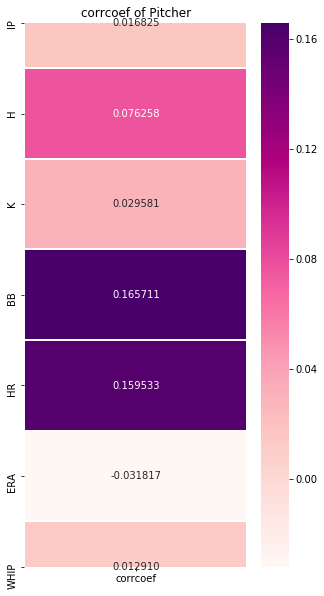

In [0]:
plt.figure(figsize=(5,10))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Pitcher')
plt.show()

In [0]:
# RobustScaler 표준화
from sklearn.preprocessing import RobustScaler
col=['IP', 'H', 'K','BB', 'HR', 'ERA', 'WHIP','PCT']
x=pit_df.values
robustScaler = RobustScaler()
x_RBS = robustScaler.fit_transform(x)

In [0]:
pit_RBS = pd.DataFrame(x_RBS, columns=col, index=pit_df.index)

In [0]:
pit_RBS

,IP,H,K,BB,HR,ERA,WHIP,PCT
0,-0.467509,-0.173646,-1.020035,-0.064764,0.453189,1.035645,1.199840,0.880000
1,0.756136,0.557416,0.768441,0.995262,-0.512184,0.416406,0.347278,0.826667
2,0.323239,0.744530,-0.543102,0.654505,0.830943,0.420392,0.585106,0.764444
3,0.385261,0.381817,0.197966,1.272281,-0.148420,0.788760,1.272197,0.711111
4,0.329994,0.412043,0.428851,1.529688,-0.064475,0.407394,0.539438,0.604444
...,...,...,...,...,...,...,...,...
295,0.547824,0.188248,1.149607,1.166978,1.213785,0.149043,-0.083963,-0.764444
296,-0.732908,-1.160470,0.185593,-1.239014,-0.636748,-0.531495,-0.934315,-1.208889
297,-1.103718,-0.891727,-0.821742,-0.638889,0.150327,2.768644,3.370161,-1.315556
298,-1.341297,-1.303308,-1.216636,-0.840125,-0.425213,1.073917,1.222882,-1.484444


In [0]:
# RBS 스케일러 저장
pit_RBS.to_csv('../Data/MLB_data_edit/p_total_RBS.csv')

In [0]:
# RBS 상관계수 구하기
col = ['IP','H','K','BB','HR','ERA','WHIP']
IP=np.corrcoef(pit_RBS['IP'],pit_RBS['PCT'])
H=np.corrcoef(pit_RBS['H'],pit_RBS['PCT'])
K=np.corrcoef(pit_RBS['K'],pit_RBS['PCT'])
BB=np.corrcoef(pit_RBS['BB'],pit_RBS['PCT'])
HR=np.corrcoef(pit_RBS['HR'],pit_RBS['PCT'])
ERA=np.corrcoef(pit_RBS['ERA'],pit_RBS['PCT'])
WHIP=np.corrcoef(pit_RBS['WHIP'],pit_RBS['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'IP':IP[1][0],
    'H':H[1][0],
    'K':K[1][0],
    'BB':BB[1][0],
    'HR':HR[1][0],
    'ERA':ERA[1][0],
    'WHIP':WHIP[1][0]
},index=['corrcoef'])

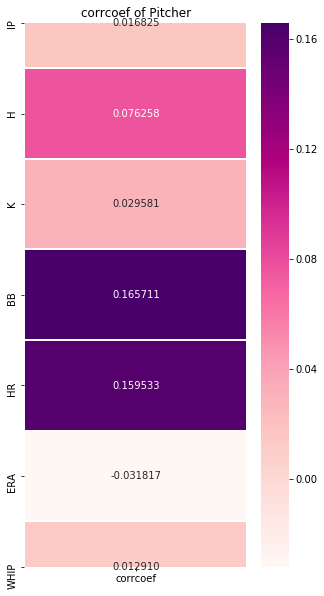

In [0]:
plt.figure(figsize=(5,10))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Pitcher')
plt.show()

In [0]:
del pit_df['PCT']

In [0]:
pit_df

,IP,H,K,BB,HR,ERA,WHIP
0,50.967857,53.678571,38.214286,19.571429,7.500000,6.366429,1.735714
1,68.295238,63.142857,59.095238,24.047619,6.000000,5.517143,1.557143
2,62.165217,65.565217,43.782609,22.608696,8.086957,5.522609,1.606957
3,63.043478,60.869565,52.434783,25.217391,6.565217,6.027826,1.750870
4,62.260870,61.260870,55.130435,26.304348,6.695652,5.504783,1.597391
...,...,...,...,...,...,...,...
295,65.345455,58.363636,63.545455,24.772727,8.681818,5.150455,1.466818
296,47.209677,40.903226,52.290323,14.612903,5.806452,4.217097,1.288710
297,41.958824,44.382353,40.529412,17.147059,7.029412,8.743235,2.190294
298,38.594595,39.054054,35.918919,16.297297,6.135135,6.418919,1.740541


In [0]:
pit_df.to_csv('../Data/MLB_data_edit/p_total_PCT_none.csv')

In [0]:
pit_df1=pd.read_csv('../Data/MLB_data_edit/p_total_PCT_none.csv')

In [0]:
del pit_df1['Unnamed: 0']

In [0]:
pit_df1.head(1)

,IP,H,K,BB,HR,ERA,WHIP
0,50.967857,53.678571,38.214286,19.571429,7.5,6.366429,1.735714


In [0]:
col=['IP', 'H', 'K','BB', 'HR', 'ERA', 'WHIP']
x=pit_df1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_MMS = min_max_scaler.fit_transform(x)
pit_MMS = pd.DataFrame(x_MMS, columns=col, index=pit_df1.index)

In [0]:
pit_MMS.head(1)

,IP,H,K,BB,HR,ERA,WHIP
0,0.303595,0.394479,0.149912,0.348935,0.573123,0.34942,0.459961


In [0]:
rank_total.head(1)

,Year,Team,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF
0,2010,Philadelphia Phillies,97,65,0.599,-,54-30,43-35,772,640,132


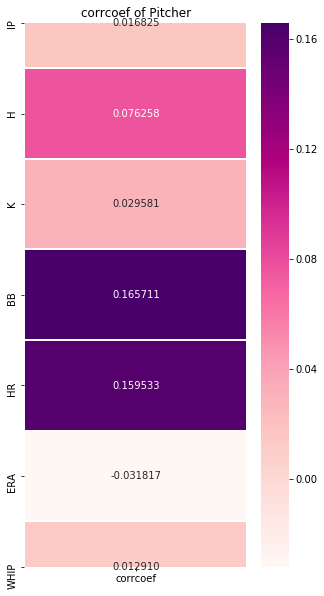

In [0]:
# MinScaler without PCT
col = ['IP','H','K','BB','HR','ERA','WHIP']
IP=np.corrcoef(pit_MMS['IP'],rank_total['PCT'])
H=np.corrcoef(pit_MMS['H'],rank_total['PCT'])
K=np.corrcoef(pit_MMS['K'],rank_total['PCT'])
BB=np.corrcoef(pit_MMS['BB'],rank_total['PCT'])
HR=np.corrcoef(pit_MMS['HR'],rank_total['PCT'])
ERA=np.corrcoef(pit_MMS['ERA'],rank_total['PCT'])
WHIP=np.corrcoef(pit_MMS['WHIP'],rank_total['PCT'])
hitmap = pd.DataFrame({
    'IP':IP[1][0],
    'H':H[1][0],
    'K':K[1][0],
    'BB':BB[1][0],
    'HR':HR[1][0],
    'ERA':ERA[1][0],
    'WHIP':WHIP[1][0]
},index=['corrcoef'])
plt.figure(figsize=(5,10))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Pitcher')
plt.show()